In [1]:
%matplotlib inline

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
%load_ext autoreload
%autoreload 2

In [11]:
import sys
sys.path.append("../..")
sys.path.append("../")
sys.path.append("./")

In [12]:
from src.data_pipeline.DataLoader import DataLoader
from src.utility.sys_utils import get_spark

# import result checking tools
from src.utility.Summary import Summary

In [17]:
spark = get_spark(cores=4) # change cores up to 6 if needed
dataloader = DataLoader(dataset_name="user_10_item_1_exp", config_name="default_config.json")

### Visualization of Evaluation Metric to Recommendation Size

In [16]:
summary = Summary(dataloader.get_config().db_path)
summary

In [20]:
hyper = summary.get_optimal_params("user_10_item_1_exp", "surprise_SVD", "ndcg@1")

result = summary.get_result_for_params("user_10_item_1_exp", "surprise_SVD", hyper, "ndcg@1")
result

Best ndcg@1 of surprise_SVD is found as 0.027279697492463437
For this model, it has a ndcg@1 of 0.027279697492463437


,model,hyper,metric,value,ts
0,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@1,0.02728,2019-12-16 23:23:48.556746


In [21]:
pd.concat([result, result], axis = 0, ignore_index=True)

,model,hyper,metric,value,ts
0,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@1,0.02728,2019-12-16 23:23:48.556746
1,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@1,0.02728,2019-12-16 23:23:48.556746


In [36]:
## get topk
def ndcg_topk(model):
    topk = pd.DataFrame(columns=['model', 'hyper', 'metric', 'value', 'ts'])

    for k in range(1,11):
        metric = "ndcg@"+str(k)
        hyper = summary.get_optimal_params("user_10_item_1_exp", model, metric)
        result = summary.get_result_for_params("user_10_item_1_exp", model, hyper, metric)
        topk = pd.concat([topk, result], axis = 0, ignore_index=True)
    topk['k'] = list(range(1,11))
    return topk

In [49]:
summary.table['model'].unique()

array(['CollectiveMF_Item', 'CollectiveMF_User', 'CollectiveMF_No',
       'CollectiveMF_Both', 'surprise_SVD', 'surprise_Baseline'],
      dtype=object)

In [51]:
## get topk for all model
all_topk = pd.DataFrame(columns=['model', 'hyper', 'metric', 'value', 'ts', 'k'])
for model in ["surprise_SVD", "surprise_Baseline"]:
    topk = ndcg_topk(model)
    all_topk = pd.concat([topk, all_topk], axis = 0, ignore_index=True)
all_topk

Best ndcg@1 of surprise_SVD is found as 0.027279697492463437
For this model, it has a ndcg@1 of 0.027279697492463437
Best ndcg@2 of surprise_SVD is found as 0.041487239706977576
For this model, it has a ndcg@2 of 0.041487239706977576
Best ndcg@3 of surprise_SVD is found as 0.05126391527016507
For this model, it has a ndcg@3 of 0.05126391527016507
Best ndcg@4 of surprise_SVD is found as 0.05908653389721221
For this model, it has a ndcg@4 of 0.05908653389721221
Best ndcg@5 of surprise_SVD is found as 0.06545405363321159
For this model, it has a ndcg@5 of 0.06545405363321159
Best ndcg@6 of surprise_SVD is found as 0.07169309900727243
For this model, it has a ndcg@6 of 0.07169309900727243
Best ndcg@7 of surprise_SVD is found as 0.07628120363566453
For this model, it has a ndcg@7 of 0.07628120363566453
Best ndcg@8 of surprise_SVD is found as 0.08095518245326408
For this model, it has a ndcg@8 of 0.08095518245326408
Best ndcg@9 of surprise_SVD is found as 0.08517931108597179
For this model, 

,model,hyper,metric,value,ts,k
0,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@1,0.029885,2019-12-16 19:12:40.652236,1
1,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@2,0.044799,2019-12-16 19:13:00.429704,2
2,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@3,0.054810,2019-12-16 19:13:20.859084,3
3,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@4,0.062795,2019-12-16 19:13:41.638279,4
4,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@5,0.069219,2019-12-16 19:14:02.256316,5
5,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@6,0.074871,2019-12-16 19:14:22.922985,6
6,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@7,0.079933,2019-12-16 19:14:42.957010,7
7,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@8,0.084514,2019-12-16 19:15:03.531478,8
8,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@9,0.088850,2019-12-16 19:15:23.908480,9
9,surprise_Baseline,"[('reg_i', 20), ('reg_u', 15)]",ndcg@10,0.092955,2019-12-16 19:15:44.424659,10


In [59]:
all_topk[all_topk['model']=='surprise_SVD']

,model,hyper,metric,value,ts,k
10,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@1,0.027280,2019-12-16 23:23:48.556746,1
11,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@2,0.041487,2019-12-16 23:27:51.163947,2
12,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@3,0.051264,2019-12-16 23:31:55.112213,3
13,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@4,0.059087,2019-12-16 23:35:57.198560,4
14,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@5,0.065454,2019-12-16 23:39:59.211880,5
15,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@6,0.071693,2019-12-16 23:44:01.802283,6
16,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@7,0.076281,2019-12-16 23:48:03.800318,7
17,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@8,0.080955,2019-12-16 23:52:06.783757,8
18,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@9,0.085179,2019-12-16 23:56:06.463978,9
19,surprise_SVD,"[('lr_all', 0.002), ('n_factors', 10), ('reg_a...",ndcg@10,0.089522,2019-12-17 00:00:07.146665,10


In [83]:
all_topk['model'].unique()

array(['surprise_Baseline', 'surprise_SVD'], dtype=object)

Text(0.5, 1.0, 'ndcg@k, ')

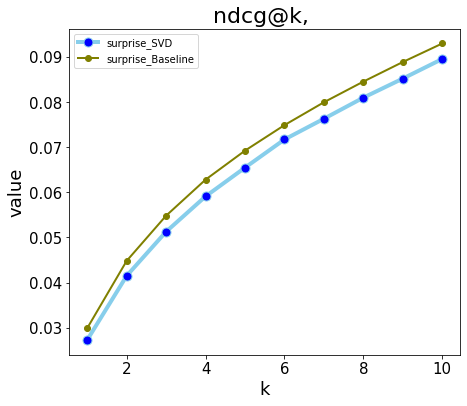

In [94]:
dfs = dict(tuple(all_topk.groupby('model')))

fig, ax = plt.subplots(1,1, figsize = (7,6))
ax.plot(dfs['surprise_SVD']['k'], dfs['surprise_SVD']['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "surprise_SVD")
ax.plot(dfs['surprise_Baseline']['k'], dfs['surprise_Baseline']['value'], marker='o', color='olive', linewidth=2, label = 'surprise_Baseline')
ax.plot(dfs['Test_implicit']['k'], dfs['Test_implicit']['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "Test_implicit")



ax.plot(sum_ALS_NEG_precision['N'], sum_ALS_NEG_precision['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
ax.plot(sum_BL_CNT_precision['N'], sum_BL_CNT_precision['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
ax.plot(sum_BL_AVG_precision['N'], sum_BL_AVG_precision['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')




ax.legend()
ax.set_xlabel("k", fontsize = 18)
ax.set_ylabel('value', fontsize = 18)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_title("ndcg@k, " , fontsize = 22)

# plt.savefig('ndcg@k', format='eps')

In [362]:
def get_tidy_df_5p(df):
    df_original = df
    df['hyperlist'] = df['hyper'].tolist()
    df = pd.DataFrame(df['hyperlist'].str.split().values.tolist())
    df.rename(columns={3: "num_neg", 5: "rank", 7:"regParam"}, inplace=True)
    df = df.drop(df.columns[[0, 1, 2, 4, 6]], axis=1) 
    
    df['num_neg'] = df['num_neg'].str.extract(r"(\d+)")
    df["num_neg"] = pd.to_numeric(df["num_neg"])

    df['rank'] = df['rank'].str.extract(r"(\d+)")
    df["rank"] = pd.to_numeric(df["rank"])

    df['regParam'] = df['regParam'].str.extract(r"(\d.\d+)")
    df["regParam"]= pd.to_numeric(df["regParam"])
    
    df_mean = pd.DataFrame( df_original['value'])
    df_mean = df_mean.reset_index(drop=True)
    df_final = pd.concat([df, df_mean], axis=1, ignore_index=True)
    
    df_model = pd.DataFrame( df_original['model'])
    df_model = df_model.reset_index(drop=True)
    df_final = pd.concat([df_final, df_model], axis=1, ignore_index=True)

    df_metric= pd.DataFrame( df_original['metric'])
    df_metric = df_metric.reset_index(drop=True)
    df_final = pd.concat([df_final, df_metric], axis=1, ignore_index=True)
    
    df_final.rename(columns={0: "num_neg", 1: "rank", 2:"regParam", 3:'value', 4:'model', 5:'metric'}, inplace=True)
    return df_final

In [420]:
def get_tidy_df_10p(df):
    df_original = df
    df['hyperlist'] = df['hyper'].tolist()
    df = pd.DataFrame(df['hyperlist'].str.split().values.tolist())
    df = df.loc[df[6] == "('regParam',"]
    
    df.rename(columns={3: "num_neg", 5: "rank", 7:"regParam"}, inplace=True)
    df = df.drop(df.columns[[0, 1, 2, 4, 6]], axis=1) 
    
    df['num_neg'] = df['num_neg'].str.extract(r"(\d+)")
    df["num_neg"] = pd.to_numeric(df["num_neg"])

    df['rank'] = df['rank'].str.extract(r"(\d+)")
    df["rank"] = pd.to_numeric(df["rank"])

    df['regParam'] = df['regParam'].str.extract(r"(\d.\d+)")
    df["regParam"]= pd.to_numeric(df["regParam"])
    
    df_mean = pd.DataFrame( df_original['value'])
    df_mean = df_mean.reset_index(drop=True)
    df_final = pd.concat([df, df_mean], axis=1, ignore_index=True)
    
    df_model = pd.DataFrame( df_original['model'])
    df_model = df_model.reset_index(drop=True)
    df_final = pd.concat([df_final, df_model], axis=1, ignore_index=True)

    df_metric= pd.DataFrame( df_original['metric'])
    df_metric = df_metric.reset_index(drop=True)
    df_final = pd.concat([df_final, df_metric], axis=1, ignore_index=True)
    
    df_final.rename(columns={0: "num_neg", 1: "rank", 2:"regParam", 3:'value', 4:'model', 5:'metric'}, inplace=True)
    df_final = df_final.loc[df_final['num_neg'] + df_final['rank'] + df_final['regParam'] > 0]
    return df_final

### Plotting

In [487]:
def get_data(datasize, als_rank, als_regParam, als_neg_rank, als_neg_regParam):
    
    ## KNN
    sum_KNN = summary.get_model_test_perf(datasize, "KNN")
    
    sum_KNN['hyper_num'] = sum_KNN.hyper.str.extract(r"(\d+)")
    sum_KNN = sum_KNN.loc[sum_KNN.hyper_num == '5'] ## filter to best params

    sum_KNN_ndcg = sum_KNN.loc[sum_KNN.metric.str.contains('ndcg') == True]
    sum_KNN_ndcg['N'] = sum_KNN_ndcg.metric.str.extract(r'(\d+)')
    sum_KNN_ndcg['N'] = pd.to_numeric(sum_KNN_ndcg['N'])
    sum_KNN_ndcg = sum_KNN_ndcg.sort_values('N')

    sum_KNN_precision = sum_KNN.loc[sum_KNN.metric.str.contains('precision') == True]
    sum_KNN_precision['N'] = sum_KNN_precision.metric.str.extract(r'(\d+)')
    sum_KNN_precision['N'] = pd.to_numeric(sum_KNN_precision['N'])
    sum_KNN_precision = sum_KNN_precision.sort_values('N')
    
    ## ALS
    sum_ALS_MF = summary.get_model_test_perf(, "ALS_MF")

    if datasize == "ml-20m-5p" or datasize == "ml-20m-20p":
        sum_ALS_tidy = get_tidy_df_5p(sum_ALS_MF)
    else:
        sum_ALS_tidy = get_tidy_df_10p(sum_ALS_MF)
    
    sum_ALS = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_rank) & (sum_ALS_tidy.num_neg == 0) & (sum_ALS_tidy.regParam == als_regParam)]

    sum_ALS_ndcg = sum_ALS.loc[sum_ALS.metric.str.contains('ndcg') == True]
    sum_ALS_ndcg['N'] = sum_ALS_ndcg.metric.str.extract(r'(\d+)', expand = True)
    sum_ALS_ndcg['N'] = pd.to_numeric(sum_ALS_ndcg['N'])
    sum_ALS_ndcg = sum_ALS_ndcg.sort_values('N')

    sum_ALS_precision = sum_ALS.loc[sum_ALS.metric.str.contains('precision') == True]
    sum_ALS_precision['N'] = sum_ALS_precision.metric.str.extract(r'(\d+)', expand = True)
    sum_ALS_precision['N'] = pd.to_numeric(sum_ALS_precision['N'])
    sum_ALS_precision = sum_ALS_precision.sort_values('N')
    
    ## ALS_NEG
    sum_ALS_NEG = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_neg_rank) & (sum_ALS_tidy.num_neg == 3) & (sum_ALS_tidy.regParam == als_neg_regParam)]

    sum_ALS_NEG_ndcg = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('ndcg') == True]
    sum_ALS_NEG_ndcg['N'] = sum_ALS_NEG_ndcg.metric.str.extract(r'(\d+)', expand = True)
    sum_ALS_NEG_ndcg['N'] = pd.to_numeric(sum_ALS_NEG_ndcg['N'])
    sum_ALS_NEG_ndcg = sum_ALS_NEG_ndcg.sort_values('N')

    sum_ALS_NEG_precision = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('precision') == True]
    sum_ALS_NEG_precision['N'] = sum_ALS_NEG_precision.metric.str.extract(r'(\d+)', expand = True)
    sum_ALS_NEG_precision['N'] = pd.to_numeric(sum_ALS_NEG_precision['N'])
    sum_ALS_NEG_precision = sum_ALS_NEG_precision.sort_values('N')
    
    ## BL_CNT
    sum_BL = summary.get_model_test_perf(datasize, "BaseLine")
    sum_BL['type'] = sum_BL.hyper.str.extract(r"(count_rank_rating)")
    sum_BL_CNT = sum_BL.loc[sum_BL.type == 'count_rank_rating']

    sum_BL_CNT_ndcg = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('ndcg') == True]
    sum_BL_CNT_ndcg['N'] = sum_BL_CNT_ndcg.metric.str.extract(r'(\d+)', expand = True)
    sum_BL_CNT_ndcg['N'] = pd.to_numeric(sum_BL_CNT_ndcg['N'])
    sum_BL_CNT_ndcg = sum_BL_CNT_ndcg.sort_values('N')

    sum_BL_CNT_precision = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('precision') == True]
    sum_BL_CNT_precision['N'] = sum_BL_CNT_precision.metric.str.extract(r'(\d+)', expand = True)
    sum_BL_CNT_precision['N'] = pd.to_numeric(sum_BL_CNT_precision['N'])
    sum_BL_CNT_precision = sum_BL_CNT_precision.sort_values('N')
    
    ## BL_AVG
    sum_BL['type'] = sum_BL.hyper.str.extract(r"(avg_rating)")
    sum_BL_AVG = sum_BL.loc[sum_BL.type == 'avg_rating']

    sum_BL_AVG_ndcg = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('ndcg') == True]
    sum_BL_AVG_ndcg['N'] = sum_BL_AVG_ndcg.metric.str.extract(r'(\d+)', expand = True)
    sum_BL_AVG_ndcg['N'] = pd.to_numeric(sum_BL_AVG_ndcg['N'])
    sum_BL_AVG_ndcg = sum_BL_AVG_ndcg.sort_values('N')

    sum_BL_AVG_precision = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('precision') == True]
    sum_BL_AVG_precision['N'] = sum_BL_AVG_precision.metric.str.extract(r'(\d+)', expand = True)
    sum_BL_AVG_precision['N'] = pd.to_numeric(sum_BL_AVG_precision['N'])
    sum_BL_AVG_precision = sum_BL_AVG_precision.sort_values('N')
    
    print(datasize, als_rank, als_regParam, als_neg_rank, als_neg_regParam)

In [468]:
def get_topN_plot(datasize):
    
    if datasize == "ml-20m-5p":
        get_data("ml-20m-5p", 32, 0.5, 4, 0.5)
    elif datasize == "ml-20m-10p":
        get_data("ml-20m-10p", 64, 0.05, 64, 0.05)
    else:
        get_data("ml-20m-20p", 64, 0.05, 64, 0.05)
    
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax[0].plot(sum_KNN_ndcg['N'], sum_KNN_ndcg['value'], marker='o', markerfacecolor='blue', markersize=9,
         color='skyblue', linewidth=4, label = "item KNN")
    ax[0].plot(sum_ALS_ndcg['N'], sum_ALS_ndcg['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
    ax[0].plot(sum_ALS_NEG_ndcg['N'], sum_ALS_NEG_ndcg['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
    ax[0].plot(sum_BL_CNT_ndcg['N'], sum_BL_CNT_ndcg['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
    ax[0].plot(sum_BL_AVG_ndcg['N'], sum_BL_AVG_ndcg['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
    ax[0].legend()
    ax[0].set_xlabel("N")
    ax[0].set_title("NDCG@N, " + str(datasize))

    ax[1].plot(sum_KNN_precision['N'], sum_KNN_precision['value'], marker='o', markerfacecolor='blue', markersize=9,
         color='skyblue', linewidth=4, label = "item KNN")
    ax[1].plot(sum_ALS_precision['N'], sum_ALS_precision['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
    ax[1].plot(sum_ALS_NEG_precision['N'], sum_ALS_NEG_precision['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
    ax[1].plot(sum_BL_CNT_precision['N'], sum_BL_CNT_precision['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
    ax[1].plot(sum_BL_AVG_precision['N'], sum_BL_AVG_precision['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
    ax[1].legend()
    ax[1].set_xlabel("N")
    ax[1].set_title("precision@N, " + str(datasize))

### ml-20m-5p

In [496]:
datasize = "ml-20m-5p"
als_rank = 32
als_regParam = 0.5
als_neg_rank = 4
als_neg_regParam = 0.5

# 32, 0.5, 4, 0.5
## KNN
sum_KNN = summary.get_model_test_perf(datasize, "KNN")
    
sum_KNN['hyper_num'] = sum_KNN.hyper.str.extract(r"(\d+)")
sum_KNN = sum_KNN.loc[sum_KNN.hyper_num == '5'] ## filter to best params

sum_KNN_ndcg = sum_KNN.loc[sum_KNN.metric.str.contains('ndcg') == True]
sum_KNN_ndcg['N'] = sum_KNN_ndcg.metric.str.extract(r'(\d+)')
sum_KNN_ndcg['N'] = pd.to_numeric(sum_KNN_ndcg['N'])
sum_KNN_ndcg = sum_KNN_ndcg.sort_values('N')

sum_KNN_precision = sum_KNN.loc[sum_KNN.metric.str.contains('precision') == True]
sum_KNN_precision['N'] = sum_KNN_precision.metric.str.extract(r'(\d+)')
sum_KNN_precision['N'] = pd.to_numeric(sum_KNN_precision['N'])
sum_KNN_precision = sum_KNN_precision.sort_values('N')
    
    ## ALS
sum_ALS_MF = summary.get_model_test_perf(datasize, "ALS_MF")

if datasize == "ml-20m-5p" or datasize == "ml-20m-20p":
    sum_ALS_tidy = get_tidy_df_5p(sum_ALS_MF)
else:
    sum_ALS_tidy = get_tidy_df_10p(sum_ALS_MF)
    
sum_ALS = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_rank) & (sum_ALS_tidy.num_neg == 0) & (sum_ALS_tidy.regParam == als_regParam)]

sum_ALS_ndcg = sum_ALS.loc[sum_ALS.metric.str.contains('ndcg') == True]
sum_ALS_ndcg['N'] = sum_ALS_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_ndcg['N'] = pd.to_numeric(sum_ALS_ndcg['N'])
sum_ALS_ndcg = sum_ALS_ndcg.sort_values('N')

sum_ALS_precision = sum_ALS.loc[sum_ALS.metric.str.contains('precision') == True]
sum_ALS_precision['N'] = sum_ALS_precision.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_precision['N'] = pd.to_numeric(sum_ALS_precision['N'])
sum_ALS_precision = sum_ALS_precision.sort_values('N')
    
## ALS_NEG
sum_ALS_NEG = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_neg_rank) & (sum_ALS_tidy.num_neg == 3) & (sum_ALS_tidy.regParam == als_neg_regParam)]

sum_ALS_NEG_ndcg = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('ndcg') == True]
sum_ALS_NEG_ndcg['N'] = sum_ALS_NEG_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_NEG_ndcg['N'] = pd.to_numeric(sum_ALS_NEG_ndcg['N'])
sum_ALS_NEG_ndcg = sum_ALS_NEG_ndcg.sort_values('N')

sum_ALS_NEG_precision = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('precision') == True]
sum_ALS_NEG_precision['N'] = sum_ALS_NEG_precision.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_NEG_precision['N'] = pd.to_numeric(sum_ALS_NEG_precision['N'])
sum_ALS_NEG_precision = sum_ALS_NEG_precision.sort_values('N')
    
## BL_CNT
sum_BL = summary.get_model_test_perf(datasize, "BaseLine")
sum_BL['type'] = sum_BL.hyper.str.extract(r"(count_rank_rating)")
sum_BL_CNT = sum_BL.loc[sum_BL.type == 'count_rank_rating']

sum_BL_CNT_ndcg = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('ndcg') == True]
sum_BL_CNT_ndcg['N'] = sum_BL_CNT_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_BL_CNT_ndcg['N'] = pd.to_numeric(sum_BL_CNT_ndcg['N'])
sum_BL_CNT_ndcg = sum_BL_CNT_ndcg.sort_values('N')

sum_BL_CNT_precision = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('precision') == True]
sum_BL_CNT_precision['N'] = sum_BL_CNT_precision.metric.str.extract(r'(\d+)', expand = True)
sum_BL_CNT_precision['N'] = pd.to_numeric(sum_BL_CNT_precision['N'])
sum_BL_CNT_precision = sum_BL_CNT_precision.sort_values('N')
    
## BL_AVG
sum_BL['type'] = sum_BL.hyper.str.extract(r"(avg_rating)")
sum_BL_AVG = sum_BL.loc[sum_BL.type == 'avg_rating']

sum_BL_AVG_ndcg = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('ndcg') == True]
sum_BL_AVG_ndcg['N'] = sum_BL_AVG_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_BL_AVG_ndcg['N'] = pd.to_numeric(sum_BL_AVG_ndcg['N'])
sum_BL_AVG_ndcg = sum_BL_AVG_ndcg.sort_values('N')
sum_BL_AVG_precision = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('precision') == True]
sum_BL_AVG_precision['N'] = sum_BL_AVG_precision.metric.str.extract(r'(\d+)', expand = True)
sum_BL_AVG_precision['N'] = pd.to_numeric(sum_BL_AVG_precision['N'])
sum_BL_AVG_precision = sum_BL_AVG_precision.sort_values('N')
    
print(datasize, als_rank, als_regParam, als_neg_rank, als_neg_regParam)

ml-20m-5p 32 0.5 4 0.5


/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


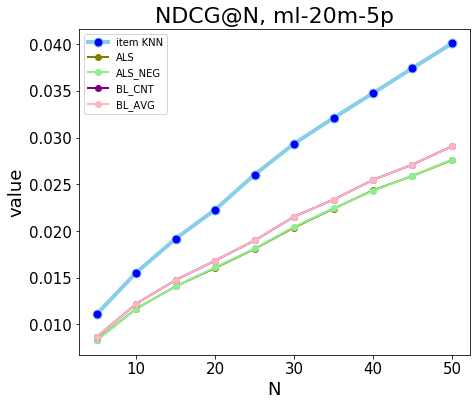

In [513]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
ax.plot(sum_KNN_ndcg['N'], sum_KNN_ndcg['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "item KNN")
ax.plot(sum_ALS_ndcg['N'], sum_ALS_ndcg['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
ax.plot(sum_ALS_NEG_ndcg['N'], sum_ALS_NEG_ndcg['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
ax.plot(sum_BL_CNT_ndcg['N'], sum_BL_CNT_ndcg['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
ax.plot(sum_BL_AVG_ndcg['N'], sum_BL_AVG_ndcg['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
ax.legend()
ax.set_xlabel("N", fontsize = 18)
ax.set_ylabel('value', fontsize = 18)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_title("NDCG@N, " + str(datasize), fontsize = 22)

plt.savefig('NDCG@N_5p', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


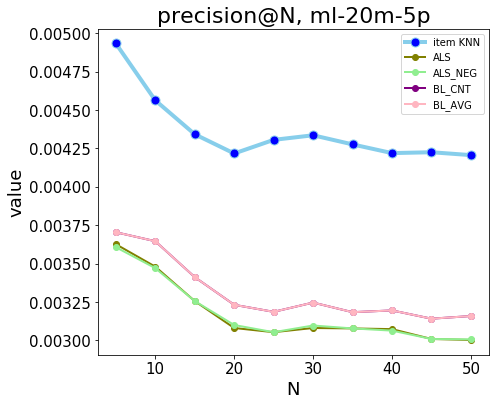

In [514]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
ax.plot(sum_KNN_precision['N'], sum_KNN_precision['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "item KNN")
ax.plot(sum_ALS_precision['N'], sum_ALS_precision['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
ax.plot(sum_ALS_NEG_precision['N'], sum_ALS_NEG_precision['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
ax.plot(sum_BL_CNT_precision['N'], sum_BL_CNT_precision['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
ax.plot(sum_BL_AVG_precision['N'], sum_BL_AVG_precision['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
ax.legend()
ax.set_xlabel("N", fontsize = 18)
ax.set_ylabel('value', fontsize = 18)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_title("precision@N, " + str(datasize), fontsize = 22)

plt.savefig('precision@N_5p', format='eps')

### ml-20m-10p

In [515]:
datasize = "ml-20m-10p"
als_rank = 64
als_regParam = 0.05
als_neg_rank = 64
als_neg_regParam = 0.05

## KNN
sum_KNN = summary.get_model_test_perf(datasize, "KNN")
    
sum_KNN['hyper_num'] = sum_KNN.hyper.str.extract(r"(\d+)")
sum_KNN = sum_KNN.loc[sum_KNN.hyper_num == '5'] ## filter to best params

sum_KNN_ndcg = sum_KNN.loc[sum_KNN.metric.str.contains('ndcg') == True]
sum_KNN_ndcg['N'] = sum_KNN_ndcg.metric.str.extract(r'(\d+)')
sum_KNN_ndcg['N'] = pd.to_numeric(sum_KNN_ndcg['N'])
sum_KNN_ndcg = sum_KNN_ndcg.sort_values('N')

sum_KNN_precision = sum_KNN.loc[sum_KNN.metric.str.contains('precision') == True]
sum_KNN_precision['N'] = sum_KNN_precision.metric.str.extract(r'(\d+)')
sum_KNN_precision['N'] = pd.to_numeric(sum_KNN_precision['N'])
sum_KNN_precision = sum_KNN_precision.sort_values('N')
    
    ## ALS
sum_ALS_MF = summary.get_model_test_perf(datasize, "ALS_MF")

if datasize == "ml-20m-5p" or datasize == "ml-20m-20p":
    sum_ALS_tidy = get_tidy_df_5p(sum_ALS_MF)
else:
    sum_ALS_tidy = get_tidy_df_10p(sum_ALS_MF)
    
sum_ALS = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_rank) & (sum_ALS_tidy.num_neg == 0) & (sum_ALS_tidy.regParam == als_regParam)]

sum_ALS_ndcg = sum_ALS.loc[sum_ALS.metric.str.contains('ndcg') == True]
sum_ALS_ndcg['N'] = sum_ALS_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_ndcg['N'] = pd.to_numeric(sum_ALS_ndcg['N'])
sum_ALS_ndcg = sum_ALS_ndcg.sort_values('N')

sum_ALS_precision = sum_ALS.loc[sum_ALS.metric.str.contains('precision') == True]
sum_ALS_precision['N'] = sum_ALS_precision.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_precision['N'] = pd.to_numeric(sum_ALS_precision['N'])
sum_ALS_precision = sum_ALS_precision.sort_values('N')
    
## ALS_NEG
sum_ALS_NEG = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_neg_rank) & (sum_ALS_tidy.num_neg == 3) & (sum_ALS_tidy.regParam == als_neg_regParam)]

sum_ALS_NEG_ndcg = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('ndcg') == True]
sum_ALS_NEG_ndcg['N'] = sum_ALS_NEG_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_NEG_ndcg['N'] = pd.to_numeric(sum_ALS_NEG_ndcg['N'])
sum_ALS_NEG_ndcg = sum_ALS_NEG_ndcg.sort_values('N')

sum_ALS_NEG_precision = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('precision') == True]
sum_ALS_NEG_precision['N'] = sum_ALS_NEG_precision.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_NEG_precision['N'] = pd.to_numeric(sum_ALS_NEG_precision['N'])
sum_ALS_NEG_precision = sum_ALS_NEG_precision.sort_values('N')
    
## BL_CNT
sum_BL = summary.get_model_test_perf(datasize, "BaseLine")
sum_BL['type'] = sum_BL.hyper.str.extract(r"(count_rank_rating)")
sum_BL_CNT = sum_BL.loc[sum_BL.type == 'count_rank_rating']

sum_BL_CNT_ndcg = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('ndcg') == True]
sum_BL_CNT_ndcg['N'] = sum_BL_CNT_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_BL_CNT_ndcg['N'] = pd.to_numeric(sum_BL_CNT_ndcg['N'])
sum_BL_CNT_ndcg = sum_BL_CNT_ndcg.sort_values('N')

sum_BL_CNT_precision = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('precision') == True]
sum_BL_CNT_precision['N'] = sum_BL_CNT_precision.metric.str.extract(r'(\d+)', expand = True)
sum_BL_CNT_precision['N'] = pd.to_numeric(sum_BL_CNT_precision['N'])
sum_BL_CNT_precision = sum_BL_CNT_precision.sort_values('N')
    
## BL_AVG
sum_BL['type'] = sum_BL.hyper.str.extract(r"(avg_rating)")
sum_BL_AVG = sum_BL.loc[sum_BL.type == 'avg_rating']

sum_BL_AVG_ndcg = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('ndcg') == True]
sum_BL_AVG_ndcg['N'] = sum_BL_AVG_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_BL_AVG_ndcg['N'] = pd.to_numeric(sum_BL_AVG_ndcg['N'])
sum_BL_AVG_ndcg = sum_BL_AVG_ndcg.sort_values('N')
sum_BL_AVG_precision = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('precision') == True]
sum_BL_AVG_precision['N'] = sum_BL_AVG_precision.metric.str.extract(r'(\d+)', expand = True)
sum_BL_AVG_precision['N'] = pd.to_numeric(sum_BL_AVG_precision['N'])
sum_BL_AVG_precision = sum_BL_AVG_precision.sort_values('N')
    
print(datasize, als_rank, als_regParam, als_neg_rank, als_neg_regParam)

ml-20m-10p 64 0.05 64 0.05


/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


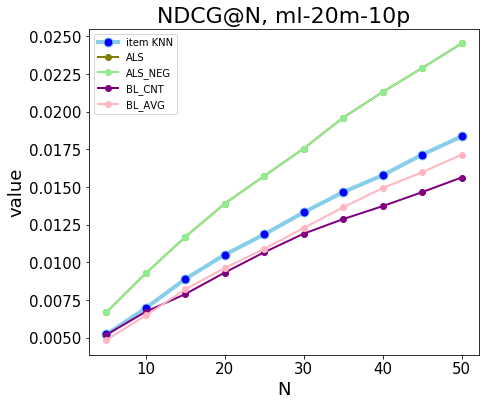

In [516]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
ax.plot(sum_KNN_ndcg['N'], sum_KNN_ndcg['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "item KNN")
ax.plot(sum_ALS_ndcg['N'], sum_ALS_ndcg['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
ax.plot(sum_ALS_NEG_ndcg['N'], sum_ALS_NEG_ndcg['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
ax.plot(sum_BL_CNT_ndcg['N'], sum_BL_CNT_ndcg['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
ax.plot(sum_BL_AVG_ndcg['N'], sum_BL_AVG_ndcg['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
ax.legend()
ax.set_xlabel("N", fontsize = 18)
ax.set_ylabel('value', fontsize = 18)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_title("NDCG@N, " + str(datasize), fontsize = 22)

plt.savefig('NDCG@N_10p', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


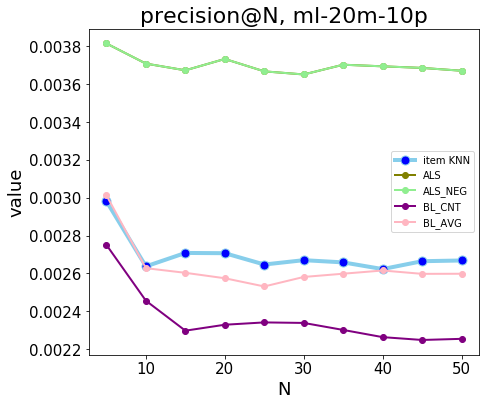

In [517]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
ax.plot(sum_KNN_precision['N'], sum_KNN_precision['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "item KNN")
ax.plot(sum_ALS_precision['N'], sum_ALS_precision['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
ax.plot(sum_ALS_NEG_precision['N'], sum_ALS_NEG_precision['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
ax.plot(sum_BL_CNT_precision['N'], sum_BL_CNT_precision['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
ax.plot(sum_BL_AVG_precision['N'], sum_BL_AVG_precision['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
ax.legend()
ax.set_xlabel("N", fontsize = 18)
ax.set_ylabel('value', fontsize = 18)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_title("precision@N, " + str(datasize), fontsize = 22)

plt.savefig('precision@N_10p', format='eps')

### ml-20m-20p

In [518]:
datasize = "ml-20m-20p"
als_rank = 64
als_regParam = 0.05
als_neg_rank = 64
als_neg_regParam = 0.05

# 32, 0.5, 4, 0.5
## KNN
sum_KNN = summary.get_model_test_perf(datasize, "KNN")
    
sum_KNN['hyper_num'] = sum_KNN.hyper.str.extract(r"(\d+)")
sum_KNN = sum_KNN.loc[sum_KNN.hyper_num == '5'] ## filter to best params

sum_KNN_ndcg = sum_KNN.loc[sum_KNN.metric.str.contains('ndcg') == True]
sum_KNN_ndcg['N'] = sum_KNN_ndcg.metric.str.extract(r'(\d+)')
sum_KNN_ndcg['N'] = pd.to_numeric(sum_KNN_ndcg['N'])
sum_KNN_ndcg = sum_KNN_ndcg.sort_values('N')

sum_KNN_precision = sum_KNN.loc[sum_KNN.metric.str.contains('precision') == True]
sum_KNN_precision['N'] = sum_KNN_precision.metric.str.extract(r'(\d+)')
sum_KNN_precision['N'] = pd.to_numeric(sum_KNN_precision['N'])
sum_KNN_precision = sum_KNN_precision.sort_values('N')
    
    ## ALS
sum_ALS_MF = summary.get_model_test_perf(datasize, "ALS_MF")

if datasize == "ml-20m-5p" or datasize == "ml-20m-20p":
    sum_ALS_tidy = get_tidy_df_5p(sum_ALS_MF)
else:
    sum_ALS_tidy = get_tidy_df_10p(sum_ALS_MF)
    
sum_ALS = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_rank) & (sum_ALS_tidy.num_neg == 0) & (sum_ALS_tidy.regParam == als_regParam)]

sum_ALS_ndcg = sum_ALS.loc[sum_ALS.metric.str.contains('ndcg') == True]
sum_ALS_ndcg['N'] = sum_ALS_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_ndcg['N'] = pd.to_numeric(sum_ALS_ndcg['N'])
sum_ALS_ndcg = sum_ALS_ndcg.sort_values('N')

sum_ALS_precision = sum_ALS.loc[sum_ALS.metric.str.contains('precision') == True]
sum_ALS_precision['N'] = sum_ALS_precision.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_precision['N'] = pd.to_numeric(sum_ALS_precision['N'])
sum_ALS_precision = sum_ALS_precision.sort_values('N')
    
## ALS_NEG
sum_ALS_NEG = sum_ALS_tidy.loc[(sum_ALS_tidy['rank'] == als_neg_rank) & (sum_ALS_tidy.num_neg == 3) & (sum_ALS_tidy.regParam == als_neg_regParam)]

sum_ALS_NEG_ndcg = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('ndcg') == True]
sum_ALS_NEG_ndcg['N'] = sum_ALS_NEG_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_NEG_ndcg['N'] = pd.to_numeric(sum_ALS_NEG_ndcg['N'])
sum_ALS_NEG_ndcg = sum_ALS_NEG_ndcg.sort_values('N')

sum_ALS_NEG_precision = sum_ALS_NEG.loc[sum_ALS_NEG.metric.str.contains('precision') == True]
sum_ALS_NEG_precision['N'] = sum_ALS_NEG_precision.metric.str.extract(r'(\d+)', expand = True)
sum_ALS_NEG_precision['N'] = pd.to_numeric(sum_ALS_NEG_precision['N'])
sum_ALS_NEG_precision = sum_ALS_NEG_precision.sort_values('N')
    
## BL_CNT
sum_BL = summary.get_model_test_perf(datasize, "BaseLine")
sum_BL['type'] = sum_BL.hyper.str.extract(r"(count_rank_rating)")
sum_BL_CNT = sum_BL.loc[sum_BL.type == 'count_rank_rating']

sum_BL_CNT_ndcg = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('ndcg') == True]
sum_BL_CNT_ndcg['N'] = sum_BL_CNT_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_BL_CNT_ndcg['N'] = pd.to_numeric(sum_BL_CNT_ndcg['N'])
sum_BL_CNT_ndcg = sum_BL_CNT_ndcg.sort_values('N')

sum_BL_CNT_precision = sum_BL_CNT.loc[sum_BL_CNT.metric.str.contains('precision') == True]
sum_BL_CNT_precision['N'] = sum_BL_CNT_precision.metric.str.extract(r'(\d+)', expand = True)
sum_BL_CNT_precision['N'] = pd.to_numeric(sum_BL_CNT_precision['N'])
sum_BL_CNT_precision = sum_BL_CNT_precision.sort_values('N')
    
## BL_AVG
sum_BL['type'] = sum_BL.hyper.str.extract(r"(avg_rating)")
sum_BL_AVG = sum_BL.loc[sum_BL.type == 'avg_rating']

sum_BL_AVG_ndcg = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('ndcg') == True]
sum_BL_AVG_ndcg['N'] = sum_BL_AVG_ndcg.metric.str.extract(r'(\d+)', expand = True)
sum_BL_AVG_ndcg['N'] = pd.to_numeric(sum_BL_AVG_ndcg['N'])
sum_BL_AVG_ndcg = sum_BL_AVG_ndcg.sort_values('N')
sum_BL_AVG_precision = sum_BL_AVG.loc[sum_BL_AVG.metric.str.contains('precision') == True]
sum_BL_AVG_precision['N'] = sum_BL_AVG_precision.metric.str.extract(r'(\d+)', expand = True)
sum_BL_AVG_precision['N'] = pd.to_numeric(sum_BL_AVG_precision['N'])
sum_BL_AVG_precision = sum_BL_AVG_precision.sort_values('N')
    
print(datasize, als_rank, als_regParam, als_neg_rank, als_neg_regParam)

ml-20m-20p 64 0.05 64 0.05


/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/envs/Spark/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


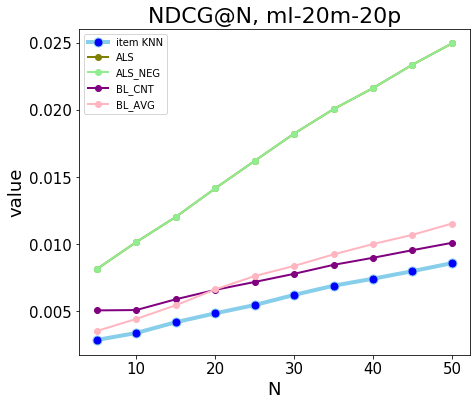

In [519]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
ax.plot(sum_KNN_ndcg['N'], sum_KNN_ndcg['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "item KNN")
ax.plot(sum_ALS_ndcg['N'], sum_ALS_ndcg['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
ax.plot(sum_ALS_NEG_ndcg['N'], sum_ALS_NEG_ndcg['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
ax.plot(sum_BL_CNT_ndcg['N'], sum_BL_CNT_ndcg['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
ax.plot(sum_BL_AVG_ndcg['N'], sum_BL_AVG_ndcg['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
ax.legend()
ax.set_xlabel("N", fontsize = 18)
ax.set_ylabel('value', fontsize = 18)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_title("NDCG@N, " + str(datasize), fontsize = 22)

plt.savefig('NDCG@N_20p', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


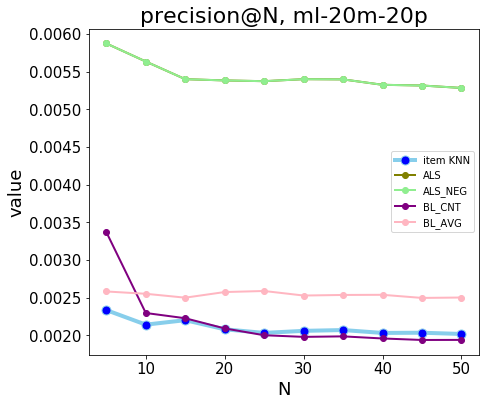

In [520]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
ax.plot(sum_KNN_precision['N'], sum_KNN_precision['value'], marker='o', markerfacecolor='blue', markersize=9,
        color='skyblue', linewidth=4, label = "item KNN")
ax.plot(sum_ALS_precision['N'], sum_ALS_precision['value'], marker='o', color='olive', linewidth=2, label = 'ALS')
ax.plot(sum_ALS_NEG_precision['N'], sum_ALS_NEG_precision['value'], marker='o', color='lightgreen', linewidth=2, label = 'ALS_NEG')
ax.plot(sum_BL_CNT_precision['N'], sum_BL_CNT_precision['value'], marker='o', color='purple', linewidth=2, label = 'BL_CNT')
ax.plot(sum_BL_AVG_precision['N'], sum_BL_AVG_precision['value'], marker='o', color='lightpink', linewidth=2, label = 'BL_AVG')
ax.legend()
ax.set_xlabel("N", fontsize = 18)
ax.set_ylabel('value', fontsize = 18)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
ax.set_title("precision@N, " + str(datasize), fontsize = 22)

plt.savefig('precision@N_20p', format='eps')